# *Data Anlaysis*

## Today's Outline
- Full Data Analysis Case-study
    - Adidas sales Analysis

## Case-study: Adidas sales EDA

This dataset can be found on Kaggle:
https://drive.google.com/file/d/16wbIxSXCfGqXAgoaFTjsurP9aKoh5DA8/view

## Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Pre-proccesing and Exploring Data

In [33]:
data = pd.read_csv('data.csv')

In [34]:
data.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","60,000","$30,000",In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","50,000","$15,000",In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","40,000","$14,000",In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"38,250","$13,388",In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"54,000","$16,200",In-store


In [35]:
data.describe()

,Retailer ID
count,9.648000e+03
mean,1.173850e+06
std,2.636038e+04
min,1.128299e+06
25%,1.185732e+06
50%,1.185732e+06
75%,1.185732e+06
max,1.197831e+06


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9641 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9646 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Sales Method      9648 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.6+ KB


In [37]:
data.shape

(9648, 12)

In [38]:
for i in data.columns:
    print(i , data[i].value_counts())

Retailer Retailer
Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: count, dtype: int64
Retailer ID Retailer ID
1185732    5265
1128299    2370
1197831    1653
1189833     360
Name: count, dtype: int64
Invoice Date Invoice Date
1/17/2021     77
8/17/2021     72
3/16/2021     72
4/17/2021     72
11/17/2021    71
              ..
6/14/2020      2
6/15/2020      2
6/17/2020      2
6/18/2020      2
6/16/2020      2
Name: count, Length: 724, dtype: int64
Region Region
West         2446
Northeast    2376
Midwest      1869
South        1726
Southeast    1224
Name: count, dtype: int64
State State
California        432
Texas             432
New York          360
Florida           360
Mississippi       216
Oregon            216
Louisiana         216
Idaho             216
New Mexico        216
Georgia           216
Arkansas          216
Virginia          216
Oklahoma          216
Connecticut       216
Rhode Is

In [39]:
data['Total Sales']=data['Total Sales'].str.replace(",","")
data['Total Sales']=data['Total Sales'].astype("int")

In [40]:
data['Price per Unit']=data['Price per Unit'].str.replace("$","").str.replace(".","")
data['Price per Unit']=data['Price per Unit'].astype("float")

In [41]:
data['Operating Profit']=data['Operating Profit'].str.replace("$","").str.replace(",","")
data['Operating Profit']=data['Operating Profit'].astype("int64")

In [42]:
data['Units Sold']=data['Units Sold'].str.replace(",","")
data['Units Sold']=data['Units Sold'].astype("int64")

In [43]:
data['Invoice Date']=pd.to_datetime(data['Invoice Date'])

In [44]:
data['month'] = data['Invoice Date'].dt.month

In [45]:
data['year'] = data['Invoice Date'].dt.year

In [46]:
data['year'].value_counts().to_frame()

,count
year,
2021,8346
2020,1302


In [47]:
data.drop(['Invoice Date','Retailer ID'] , axis=1, inplace=True)

In [48]:
data.head(3)

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,month,year
0,Foot Locker,Northeast,New York,New York,Men's Street Footwear,5000.0,1200,60000,30000,In-store,1,2020
1,Foot Locker,Northeast,New York,New York,Men's Athletic Footwear,5000.0,1000,50000,15000,In-store,1,2020
2,Foot Locker,Northeast,New York,New York,Women's Street Footwear,4000.0,1000,40000,14000,In-store,1,2020


In [49]:
mode = data.Region.mode()
mode

0    West
Name: Region, dtype: object

In [50]:
data.Region = data.Region.fillna("West" )

In [51]:
data[ 'Price per Unit']=data[ 'Price per Unit']. fillna(value = data[ 'Price per Unit']. mean ( ))

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Region            9648 non-null   object 
 2   State             9648 non-null   object 
 3   City              9648 non-null   object 
 4   Product           9648 non-null   object 
 5   Price per Unit    9648 non-null   float64
 6   Units Sold        9648 non-null   int64  
 7   Total Sales       9648 non-null   int32  
 8   Operating Profit  9648 non-null   int64  
 9   Sales Method      9648 non-null   object 
 10  month             9648 non-null   int32  
 11  year              9648 non-null   int32  
dtypes: float64(1), int32(3), int64(2), object(6)
memory usage: 791.6+ KB


In [53]:
max_sales = data.groupby('Product')['Total Sales'].agg(["max", "min" , "mean" , "sum"])
max_sales

,max,min,mean,sum
Product,,,,
Men's Apparel,61750,25,7675.330218,12318905
Men's Athletic Footwear,71250,74,9544.975155,15367410
Men's Street Footwear,81000,157,12970.601863,20882669
Men's aparel,54000,54000,54000.000000,54000
Women's Apparel,82500,91,11134.272388,17903910
Women's Athletic Footwear,54000,0,6639.623288,10663235
Women's Street Footwear,66500,37,7960.393657,12800313


In [54]:
data.groupby('Region')['Price per Unit'].agg(["max", "min" , "mean" , "sum"])

,max,min,mean,sum
Region,,,,
Midwest,8000.0,900.0,4035.741038,7.542800e+06
Northeast,8000.0,1600.0,4668.527594,1.109242e+07
South,11000.0,700.0,3824.056526,6.600322e+06
Southeast,11000.0,1700.0,5018.300654,6.142400e+06
West,10500.0,700.0,4992.295149,1.224610e+07


In [55]:
data['Sales Method'].value_counts().to_frame()

,count
Sales Method,
Online,4889
Outlet,3019
In-store,1740


<Axes: xlabel='Sales Method', ylabel='count'>

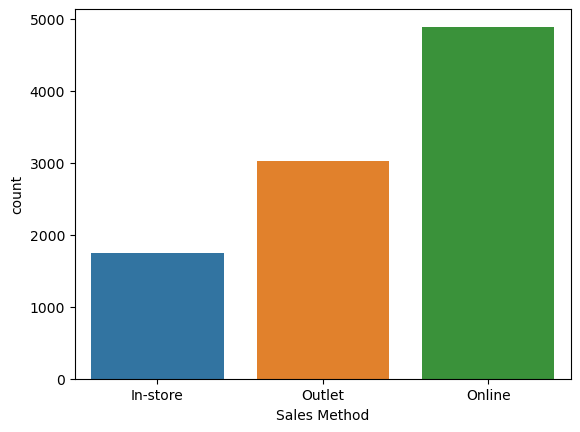

In [56]:
sns.countplot(data=data , x='Sales Method')

<Axes: xlabel='Region', ylabel='count'>

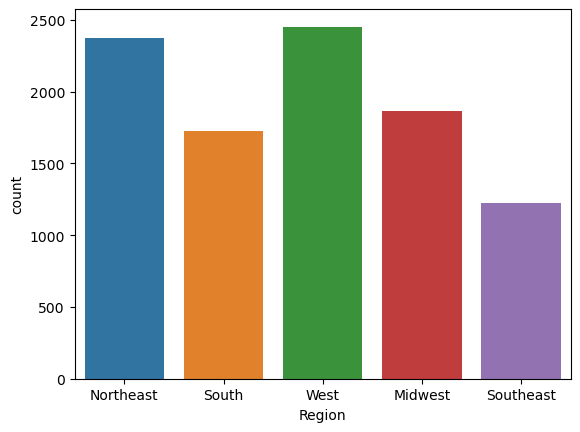

In [57]:
sns.countplot(data=data , x='Region')

In [58]:
total_sales_per_category = data.groupby('Product')['Total Sales'].sum().to_frame()
total_sales_per_category


,Total Sales
Product,
Men's Apparel,12318905
Men's Athletic Footwear,15367410
Men's Street Footwear,20882669
Men's aparel,54000
Women's Apparel,17903910
Women's Athletic Footwear,10663235
Women's Street Footwear,12800313


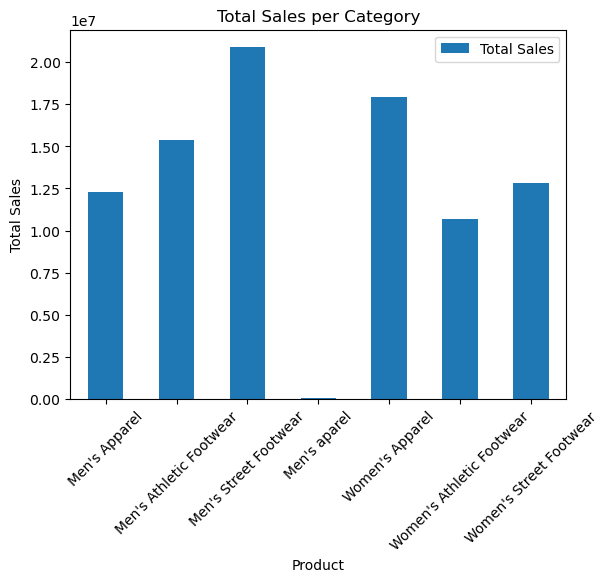

In [59]:
total_sales_per_category.plot(kind='bar')
plt.title('Total Sales per Category')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

## End